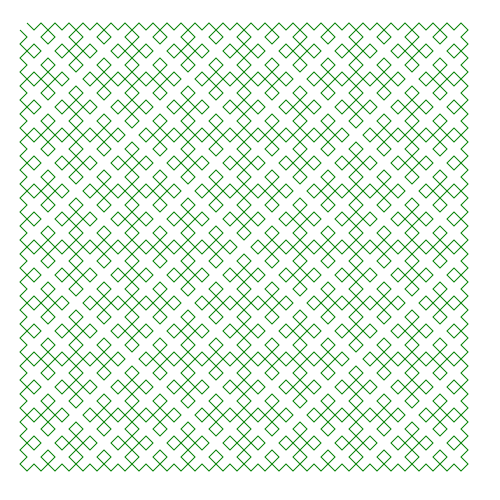

Turtle at -7,-7 facing 315.0


In [2]:
import math  # import math module
from IPython.display import SVG, display

"""
A simple turtle graphics example that produces SVG output that can
be displayed in Jupyter.
"""

class Turtle:
    " Turtle graphics drawing to SVG path "  # class docstring
    
    DEG2RAD = math.pi/180  # class level variable
    
    @staticmethod
    def deg2rad(d):  # static method
        """ Convert degrees to radians """
        return d * Turtle.DEG2RAD
    
    def __init__(self):  # class constructor; "self" is like "this"
        # We don't declare instance variables explicitly in Python; we simply
        # assign values to them during construction. In this case we will
        # do all of that in the reset() method.
        self.reset()
        
    def reset(self):
        self.draw = True  # instance variable
        self.path = "M0,0 "
        self.x = self.y = 0
        self.turnto(0.0)
    
    def turnto(self, angle):
        " Turn to absolute angle. "
        self.angle = angle % 360.0
        self.dx = math.sin(Turtle.deg2rad(self.angle))
        self.dy = math.cos(Turtle.deg2rad(self.angle))
        
    def right(self, angle):
        " Relative turn "
        self.turnto(self.angle + angle)

    def left(self, angle):
        self.right(angle)
        
    def up(self):
        self.draw = False
        
    def down(self):
        self.draw = True
        
    def move(self, distance):
        " Relative move by distance "
        self.x = int(distance * self.dx)
        self.y = int(distance * self.dy)
        self.path += f"{'l' if self.draw else 'm'}{self.x},{self.y} "

    def moveto(self, x, y):
        " Absolute move to (x, y)"
        self.x = x
        self.y = y
        self.path += f"{'L' if self.draw else 'M'}{self.x},{self.y} "
        
    def svg(self):
        return '<svg id="doc" xmlns="http://www.w3.org/2000/svg" ' +\
            'version="1.1" width="500" height="500"><path d="' +\
            self.path +\
            '" stroke="green" fill="none" vector-effect="non-scaling-stroke" /></svg>'
            
    def __str__(self):
        " Convert to string representation. "
        return f"Turtle at {self.x},{self.y} facing {self.angle}"

            
def swisscross(turtle, level):  # top-level function
    " Swiss cross is a space filling curve. "
    if level >= 0:
        swisscross(turtle, level - 1)
        t.right(90)
        swisscross(turtle, level - 1)
        t.move(10)
        swisscross(turtle, level - 1)
        t.right(90)
        swisscross(turtle, level - 1)
        

t = Turtle()  # create class instance; note no 'new' 
t.up()
t.moveto(20, 30)
t.turnto(315)
t.down()
swisscross(t, 5)
t.move(10)
swisscross(t, 5)

# Display the result using SVG
display(SVG(t.svg()))
        
# final state
print(t)